# Assignment 09 - Craft Brew Visulization

**Spencer Fairbairn**   
**[Department of Information Science, CU Boulder](www.colorado.edu/cmci/academics/information-science)**  

In this assignment we will focus on data visulization through
- merging data sets
- averaging data
- running groupby analysis
- graphing data


** Notebook Motivation**
For this notebook I wanted to be able to find out what state would be the best to be in for craft beers. I wanted to go through and learn a little more about craft brews as a whole since I did not know too much before doing this assignment. I wanted to find out what beer type has the most alcohol, what beer style is the most popular, what city makes the most beers, and what brewery makes the most beers. I chose to go through and work on visulization because I believe that I did not know to much about this before going into this assignment. I wanted to expand on what we learned as well as figure out new ways to do things.

In [62]:
% matplotlib inline
import numpy as np
import pandas as pd
import json
import seaborn as sb
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()

#Help from https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.axhline.html

Pull up the Breweries.csv

In [63]:
breweries_df = pd.read_csv('breweries.csv')
breweries_df.head()

,brewery_id,brewery_name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA


Pull up Beers.csv

In [162]:
beers_df = pd.read_csv('beers.csv', encoding='mac_roman')
beers_df.head()

,abv,ibu,id,beer_name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


Run a merge on the two data sets to make one large data set and name it `brew_df`

In [177]:
brew_df['abv'] = brew_df['abv']*100 
brew_df = pd.merge(breweries_df,beers_df,left_on='brewery_id',right_on='brewery_id',how='left')
brew_df.head()

,brewery_id,brewery_name,city,state,abv,ibu,id,beer_name,style,ounces
0,0,NorthGate Brewing,Minneapolis,MN,0.045,50.0,2692,Get Together,American IPA,16.0
1,0,NorthGate Brewing,Minneapolis,MN,0.049,26.0,2691,Maggie's Leap,Milk / Sweet Stout,16.0
2,0,NorthGate Brewing,Minneapolis,MN,0.048,19.0,2690,Wall's End,English Brown Ale,16.0
3,0,NorthGate Brewing,Minneapolis,MN,0.060,38.0,2689,Pumpion,Pumpkin Ale,16.0
4,0,NorthGate Brewing,Minneapolis,MN,0.060,25.0,2688,Stronghold,American Porter,16.0


Multiply the abv by 100 to get the alcohol content 

In [178]:
brew_df['abv'] = brew_df['abv']*100 

Drop the 'id' column 

In [179]:
brew_df.drop(['id'], axis = 1).head()

,brewery_id,brewery_name,city,state,abv,ibu,beer_name,style,ounces
0,0,NorthGate Brewing,Minneapolis,MN,4.5,50.0,Get Together,American IPA,16.0
1,0,NorthGate Brewing,Minneapolis,MN,4.9,26.0,Maggie's Leap,Milk / Sweet Stout,16.0
2,0,NorthGate Brewing,Minneapolis,MN,4.8,19.0,Wall's End,English Brown Ale,16.0
3,0,NorthGate Brewing,Minneapolis,MN,6.0,38.0,Pumpion,Pumpkin Ale,16.0
4,0,NorthGate Brewing,Minneapolis,MN,6.0,25.0,Stronghold,American Porter,16.0


Group the style column by style

In [180]:
brew_group = brew_df.groupby('style')

Run a groupby test on the city and brewery_name columns and then sort the data to see what city has the most breweries 

In [181]:
brew_df.groupby('city')['brewery_name'].count().sort_values(ascending=False).head()

city
Grand Rapids    66
Portland        64
Chicago         55
Indianapolis    43
San Diego       42
Name: brewery_name, dtype: int64

Now make a graph that portrays the data above

Text(0,0.5,'Number of Breweries')

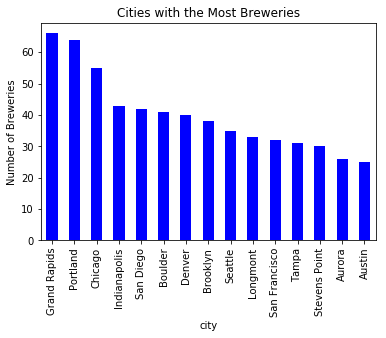

In [197]:
city_brew = brew_df.groupby('city')['brewery_name'].count().nlargest(15).plot(kind='bar', 
               title='Cities with the Most Breweries', 
               color='b',  )
city_brew.set_ylabel('Number of Breweries')

Run a test on the data to be able to see what state has the highest alcohol content

In [185]:
brew_df[['abv', 'state']].sort_values(by='abv', ascending=False).head()

,abv,state
374,12.8,CO
7,12.5,KY
143,12.0,IN
375,10.4,CO
335,10.0,NY


Run a test to see what style of beer has the highest average alcohol content

In [187]:
agg_brew = {'abv': np.mean}

brew_agg = brew_group.agg(agg_brew).sort_values('abv', ascending = False).reset_index()
brew_agg.head()

,style,abv
0,English Barleywine,10.766667
1,Quadrupel (Quad),10.400000
2,American Malt Liquor,9.900000
3,American Barleywine,9.900000
4,Russian Imperial Stout,9.763636


Graph the data from up above and name the graph "Beer Styles with Highest Average Alcohol by Volume"

[]

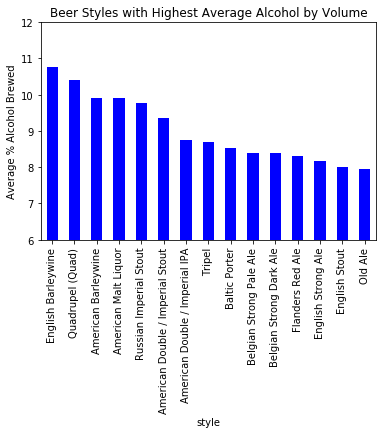

In [196]:
high_alc = brew_df.groupby('style')['abv'].mean().nlargest(15).plot(kind='bar', 
               title='Beer Styles with Highest Average Alcohol by Volume', 
               color='b', ylim=(6,12) )
high_alc.set_ylabel('Average % Alcohol Brewed')
high_alc.plot()

What state has the most amount of breweries?

In [155]:
brew_df['state'].value_counts().head()

 CO    265
 CA    183
 MI    162
 IN    139
 TX    130
Name: state, dtype: int64

Graph the above data and add a line that shows the average number of breweries

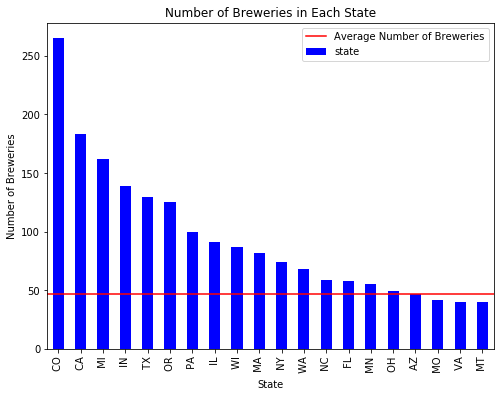

In [199]:
state_brew = brew_df.state.value_counts().nlargest(20).plot(kind='bar',color='b', title="Number of Breweries in Each State", 
                             figsize=(8,6))
state_brew.set_xlabel('State')
state_brew.set_ylabel('Number of Breweries')
mean_line = state_brew.axhline(brew_df.state.value_counts().mean(), color='r',
                         label='Average Number of Breweries')
state_brew.legend()

What Brewery has the most beers?

In [154]:
brew_df['brewery_name'].value_counts().head()

Brewery Vivant                62
Oskar Blues Brewery           46
Sun King Brewing Company      38
Cigar City Brewing Company    25
Sixpoint Craft Ales           24
Name: brewery_name, dtype: int64

Finally, show what style of beer is the most popular to brew

Text(0,0.5,'Number of Different Beers')

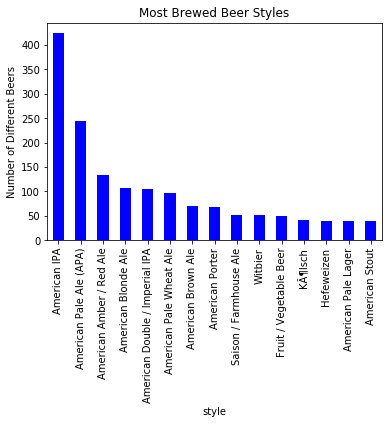

In [200]:
brew_style = brew_df.groupby('style')['beer_name'].count().nlargest(15).plot(kind='bar', 
               title='Most Brewed Beer Styles', 
               color='b',  )

brew_style.set_ylabel('Number of Different Beers')